In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [63]:
data = data.drop(['color', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', \
                'actor_1_facebook_likes', 'actor_1_name', 'content_rating', 'cast_total_facebook_likes', \
                'actor_3_name', 'facenumber_in_poster', 'movie_imdb_link', 'actor_2_facebook_likes', \
                'movie_facebook_likes', 'plot_keywords', 'gross', 'aspect_ratio'], axis=1)
data.head()

,director_name,num_critic_for_reviews,duration,genres,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score
0,James Cameron,723.0,178.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,3054.0,English,USA,237000000.0,2009.0,7.9
1,Gore Verbinski,302.0,169.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300000000.0,2007.0,7.1
2,Sam Mendes,602.0,148.0,Action|Adventure|Thriller,Spectre,275868,994.0,English,UK,245000000.0,2015.0,6.8
3,Christopher Nolan,813.0,164.0,Action|Thriller,The Dark Knight Rises,1144337,2701.0,English,USA,250000000.0,2012.0,8.5
4,Doug Walker,NaN,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,NaN,7.1


In [64]:
data.shape

(5043, 12)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           4939 non-null   object 
 1   num_critic_for_reviews  4993 non-null   float64
 2   duration                5028 non-null   float64
 3   genres                  5043 non-null   object 
 4   movie_title             5043 non-null   object 
 5   num_voted_users         5043 non-null   int64  
 6   num_user_for_reviews    5022 non-null   float64
 7   language                5029 non-null   object 
 8   country                 5038 non-null   object 
 9   budget                  4551 non-null   float64
 10  title_year              4935 non-null   float64
 11  imdb_score              5043 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 472.9+ KB


In [66]:
data.isnull().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
genres                      0
movie_title                 0
num_voted_users             0
num_user_for_reviews       21
language                   14
country                     5
budget                    492
title_year                108
imdb_score                  0
dtype: int64

In [67]:
data.dropna(axis=0, inplace=True)
# data.shape

In [68]:
data.duplicated().sum()

41

In [69]:
data = data.drop_duplicates()
# data.duplicated().sum()
# data.shape

In [70]:
data['title_year'] = data['title_year'].astype(int)
# data.info()

In [86]:
# Number of users who voted recently
recently_released_movies = data[data['title_year'] >= 2000]
recently_released_movies.groupby('title_year')['num_voted_users'].mean().sort_values(ascending=False)

title_year
2012    118273.422680
2013    109991.100000
2010    105968.943299
2008    105034.970000
2007    103841.737430
2011    101629.445545
2004    100030.062176
2003     94931.108974
2009     89152.778302
2006     88474.665094
2001     88116.055866
2014     87919.253456
2005     85601.915000
2000     78615.460123
2002     77607.550505
2015     63285.458763
2016     39750.797753
Name: num_voted_users, dtype: float64

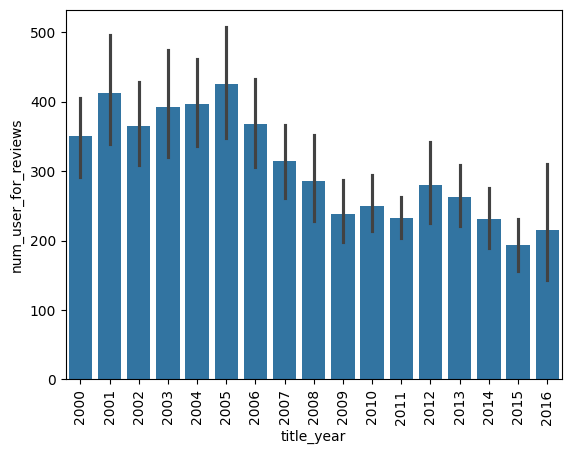

In [87]:
sns.barplot(x='title_year', y='num_user_for_reviews', data=recently_released_movies)
plt.xticks(rotation=90)
plt.show()

In [103]:
# The rating of the movies by languages
data.groupby('language')['imdb_score'].mean().sort_values(ascending=False)

language
Telugu        8.400000
Persian       8.133333
Danish        7.900000
Indonesian    7.900000
Maya          7.800000
Portuguese    7.716667
Korean        7.616667
German        7.586667
Hebrew        7.500000
Dari          7.500000
Dzongkha      7.500000
Swedish       7.466667
Dutch         7.425000
Czech         7.400000
Swahili       7.400000
Vietnamese    7.400000
Japanese      7.313333
Mongolian     7.300000
Romanian      7.200000
Norwegian     7.150000
French        7.138889
Arabic        7.100000
Zulu          7.100000
Hungarian     7.100000
Aramaic       7.100000
Italian       7.055556
Mandarin      7.025000
Cantonese     7.022222
Hindi         6.971429
Aboriginal    6.950000
Spanish       6.908571
Icelandic     6.900000
Filipino      6.700000
Thai          6.633333
Panjabi       6.600000
Slovenian     6.400000
English       6.380698
Chinese       6.200000
Russian       6.011111
Kazakh        6.000000
Tamil         5.100000
Bosnian       4.300000
Name: imdb_score, dtype: 

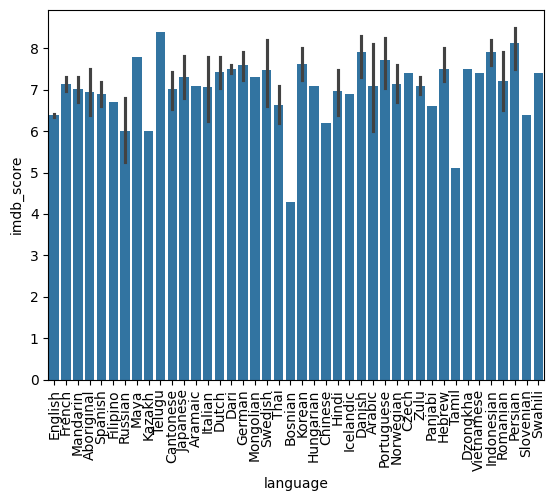

In [104]:
sns.barplot(x='language', y='imdb_score', data=data)
plt.xticks(rotation=90)
plt.show()

In [105]:
# Counting the number of movies
data['title_year'].value_counts()

title_year
2014    217
2009    212
2006    212
2013    210
2011    202
       ... 
1958      1
1950      1
1930      1
1927      1
1934      1
Name: count, Length: 88, dtype: int64

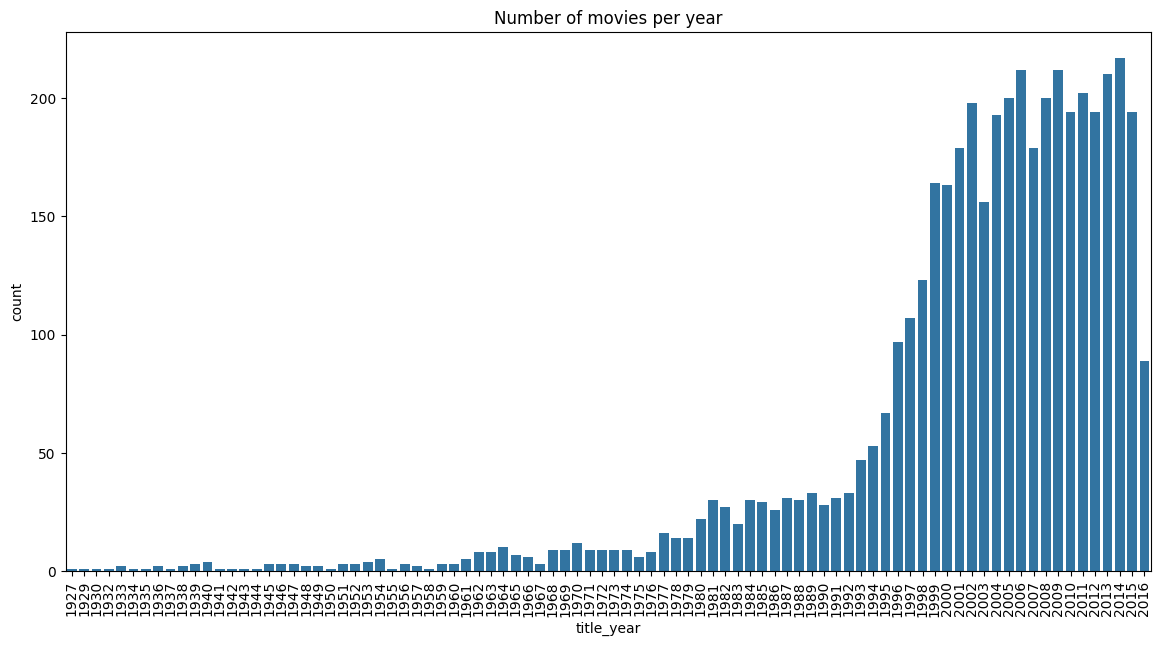

In [106]:
plt.figure(figsize=(14, 7))
sns.countplot(x='title_year', data=data)
plt.title('Number of movies per year')
plt.xticks(rotation=90)
plt.show()

In [109]:
# Top 10 movies with the highest budget
top10_highest_budget = data.nlargest(10, 'budget')[['movie_title', 'budget']].set_index('movie_title')

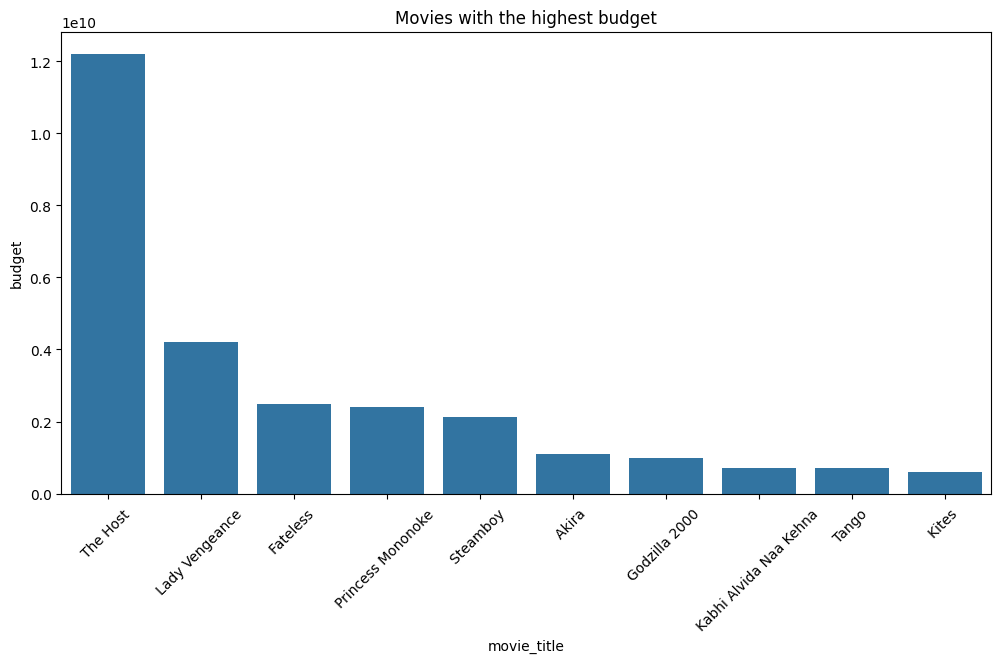

In [117]:
plt.figure(figsize=(12, 6))
sns.barplot(x='movie_title', y='budget', data=top10_highest_budget)
plt.title('Movies with the highest budget')
plt.xticks(rotation=45)
plt.show()

In [140]:
# Top 20 movies with the highest rating
top10 = data.nlargest(20, 'imdb_score')[['movie_title', 'imdb_score', 'director_name']].set_index('movie_title')
top10

,imdb_score,director_name
movie_title,,
The Shawshank Redemption,9.3,Frank Darabont
The Godfather,9.2,Francis Ford Coppola
The Dark Knight,9.0,Christopher Nolan
The Godfather: Part II,9.0,Francis Ford Coppola
The Lord of the Rings: The Return of the King,8.9,Peter Jackson
Schindler's List,8.9,Steven Spielberg
Pulp Fiction,8.9,Quentin Tarantino
"The Good, the Bad and the Ugly",8.9,Sergio Leone
12 Angry Men,8.9,Sidney Lumet


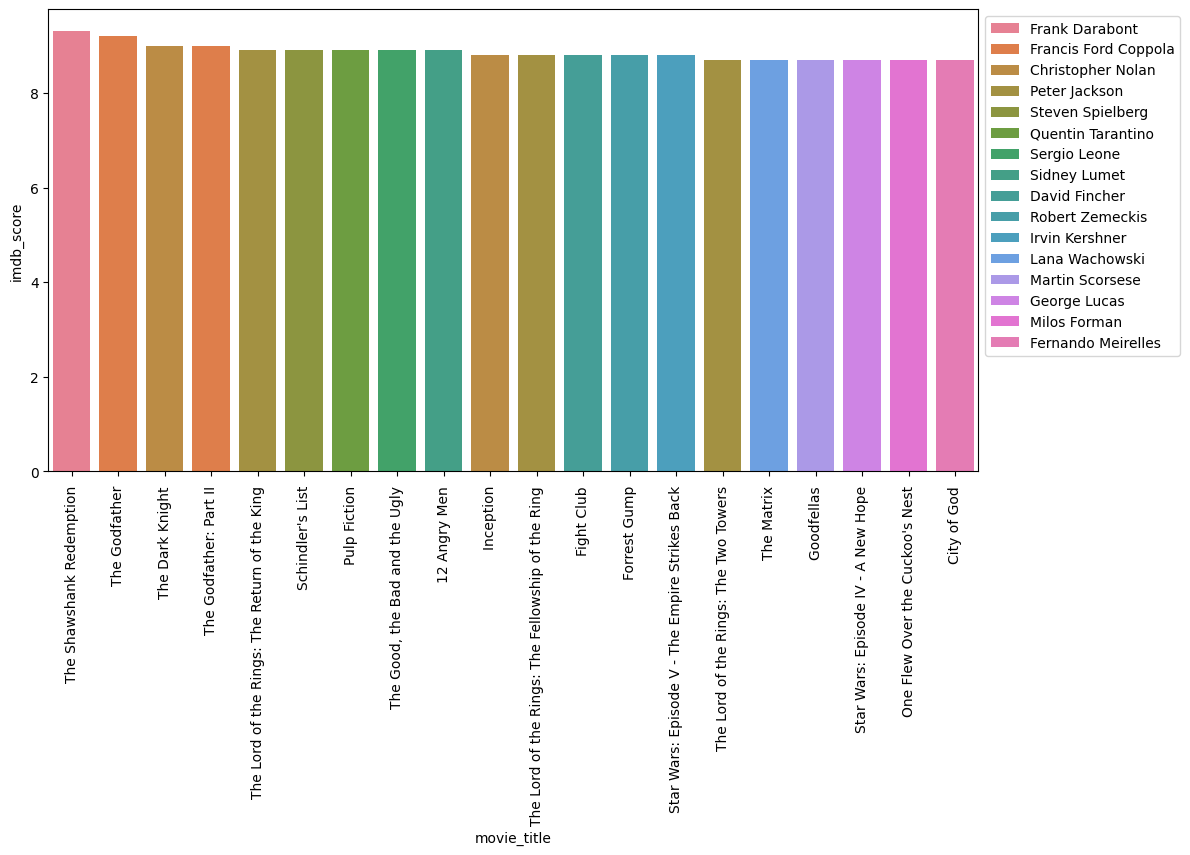

In [157]:
plt.figure(figsize=(12, 6))
sns.barplot(x='movie_title', y='imdb_score', palette='husl', data=top10, hue='director_name', dodge=False)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=90)
plt.show()

In [142]:
def rating(rating):
    if rating >= 8:
        return "Excellent"
    elif rating >= 7:
        return "Good"
    elif rating >= 5:
        return "Normal"
    else:
        return "-"

In [143]:
data['rating'] = data['imdb_score'].apply(rating)
data.head()

,director_name,num_critic_for_reviews,duration,genres,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,rating
0,James Cameron,723.0,178.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,3054.0,English,USA,237000000.0,2009,7.9,Good
1,Gore Verbinski,302.0,169.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300000000.0,2007,7.1,Good
2,Sam Mendes,602.0,148.0,Action|Adventure|Thriller,Spectre,275868,994.0,English,UK,245000000.0,2015,6.8,Normal
3,Christopher Nolan,813.0,164.0,Action|Thriller,The Dark Knight Rises,1144337,2701.0,English,USA,250000000.0,2012,8.5,Excellent
5,Andrew Stanton,462.0,132.0,Action|Adventure|Sci-Fi,John Carter,212204,738.0,English,USA,263700000.0,2012,6.6,Normal


In [144]:
genres_count = data['genres'].str.split('|', expand=True).stack().value_counts()
print(genres_count)

Drama          2232
Comedy         1662
Thriller       1286
Action         1083
Romance         988
Adventure       872
Crime           793
Sci-Fi          569
Fantasy         565
Horror          506
Family          499
Mystery         435
Biography       270
Animation       222
War             196
History         189
Music           178
Sport           160
Musical         122
Documentary      90
Western          85
Film-Noir         5
Short             2
News              2
Name: count, dtype: int64


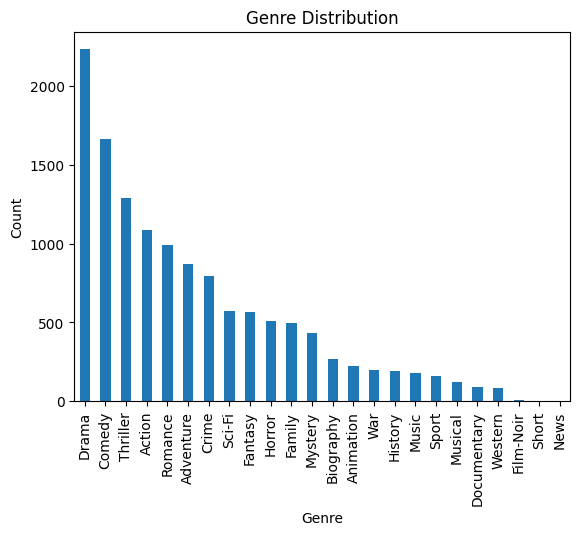

In [145]:
genres_count.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [147]:
top10_duration = data.nlargest(10, 'duration')[['movie_title', 'duration']].set_index('movie_title')
top10_duration

,duration
movie_title,
"Blood In, Blood Out",330.0
Heaven's Gate,325.0
The Legend of Suriyothai,300.0
Das Boot,293.0
Apocalypse Now,289.0
Gods and Generals,280.0
Gettysburg,271.0
Arn: The Knight Templar,270.0
Cleopatra,251.0


C:\Users\User\AppData\Local\Temp\ipykernel_17244\2422303304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration', y='movie_title', palette='hls', data=top10_duration)


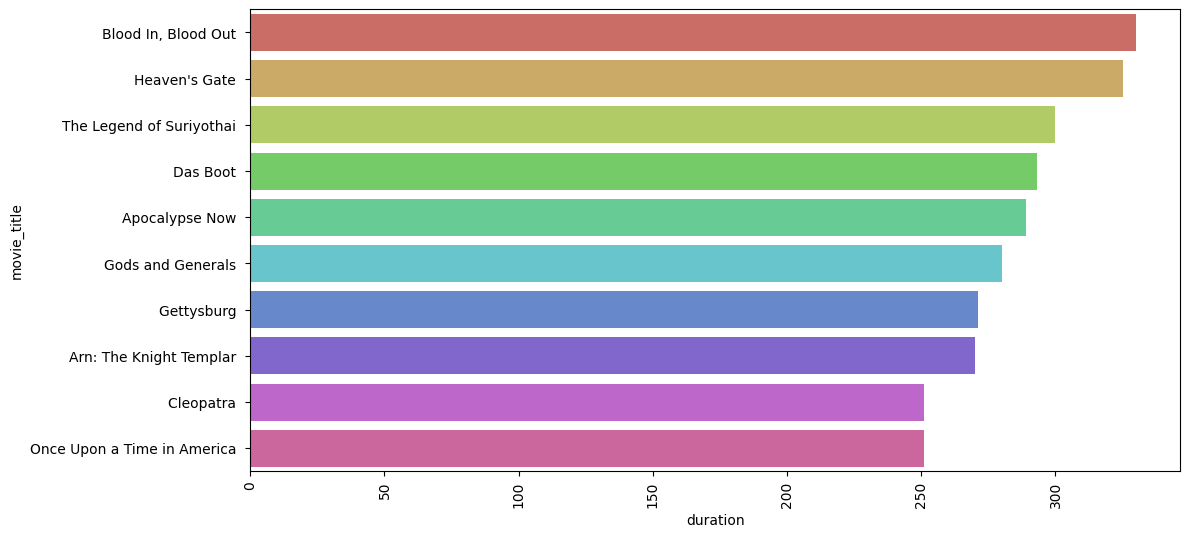

In [162]:
plt.figure(figsize=(12, 6))
sns.barplot(x='duration', y='movie_title', palette='hls', data=top10_duration)
plt.xticks(rotation=90)
plt.show()

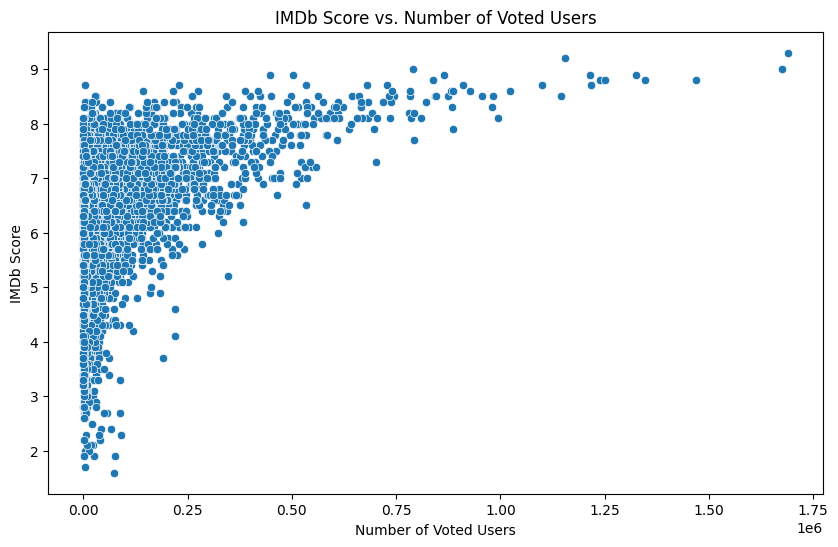

In [165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_voted_users', y='imdb_score', data=data)
plt.title('IMDb Score vs. Number of Voted Users')
plt.xlabel('Number of Voted Users')
plt.ylabel('IMDb Score')
plt.show()

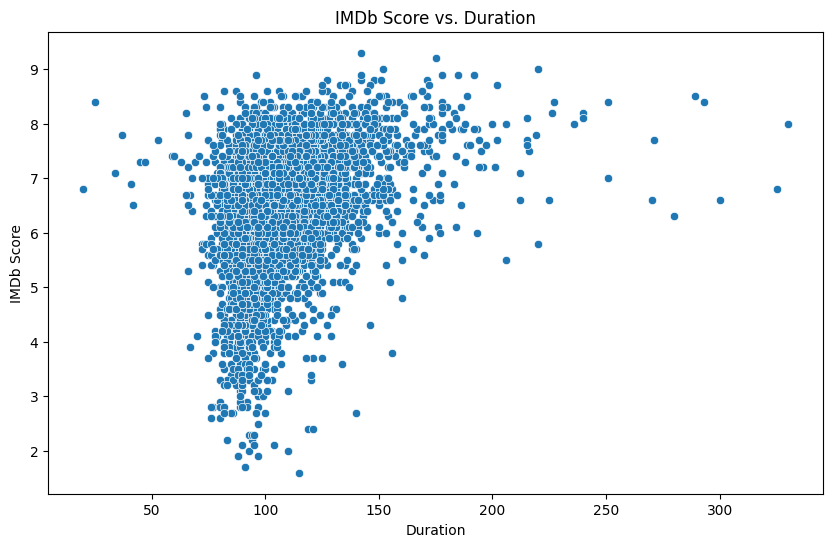

In [167]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='imdb_score', data=data)
plt.title('IMDb Score vs. Duration')
plt.xlabel('Duration')
plt.ylabel('IMDb Score')
plt.show()

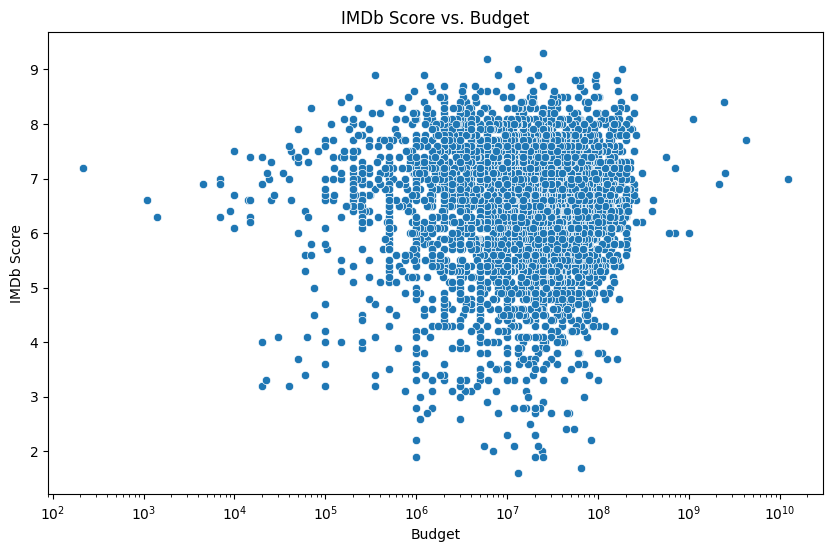

In [169]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='imdb_score', data=data)
plt.xscale('log')
plt.title('IMDb Score vs. Budget')
plt.xlabel('Budget')
plt.ylabel('IMDb Score')
plt.show()